In [49]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import urllib.request
import urllib.parse
import csv
from matplotlib.patches import Rectangle

In [40]:
def Sampler(data,male_age_low=16,male_age_high=70,female_age_low=16,female_age_high=47):
    csv_contents_image_gender = []
    csv_contents_image_gender_complement = []
    csv_contents_image_age = []
    csv_contents_image_age_complement = []
    
    for item in data:
        img_url = item['img_url']
        file_name = item['name'] + '_' + item['final_gender'] + '_' + str(item['final_age']) + '.jpg'
        file_name_partial = 'FinalData/Images/' + file_name
        age = item['final_age']
        if (item['gender'] == 'M'):
            gender = "male"
        elif (item['gender'] == 'F'):
            gender = "female"
        partial_entry_file_gender = {'name' : file_name_partial, 'gender' : gender}
        partial_entry_file_age = {'name' : file_name_partial, 'age' : age}
        
        if (gender == "male" and age >= male_age_low and age <= male_age_high) or (gender == "female" and age >= female_age_low and age <= female_age_high):
            csv_contents_image_gender.append(partial_entry_file_gender)
            csv_contents_image_age.append(partial_entry_file_age)
        else:
            csv_contents_image_gender_complement.append(partial_entry_file_gender)
            csv_contents_image_age_complement.append(partial_entry_file_age)
            
    return csv_contents_image_gender,csv_contents_image_age, csv_contents_image_gender_complement,csv_contents_image_age_complement

In [70]:
def stats(csv_contents_image_age,csv_contents_image_gender):
    print("total entries",len(csv_contents_image_age))
    countmale = []
    countfemale = []
    for item in zip(csv_contents_image_age, csv_contents_image_gender):
        if item[1]['gender'] == "male":
            countmale.append(item[0]['age'])
        else:
            countfemale.append(item[0]['age'])
    print("Number of males in this age group",len(countmale))
    print("Number of females in this age group",len(countfemale))
    if countmale == countfemale:
        colors = ['orange', 'orange']
    else:
        colors = ['blue', 'orange']
    labels = ['males','females']
    plt.title("Histogram of age differentiated on frequency in each bin per gender")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.hist(countmale, bins=60,histtype='step',color=colors[0])  # arguments are passed to np.histogram
    plt.hist(countfemale, bins=60,histtype='step',color=colors[1])
    plt.legend(labels)
    plt.show()
    
def csv_write(dictobj,filename):
    keys = dictobj[0].keys()
    with open(filename, 'w') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(dictobj)

total entries 1499
Number of males in this age group 1017
Number of females in this age group 482


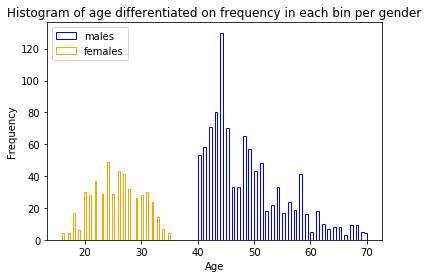

In [69]:
csv_contents_image_gender = []
csv_contents_image_age = []
csv_contents_image_gender_complement = []
csv_contents_image_age_complement = []
with open('./sports_final.json') as f:
    data = json.load(f)
    #Get the extreme biased data
    csv_contents_image_gender,csv_contents_image_age,csv_contents_image_gender_complement,csv_contents_image_age_complement = Sampler(data,male_age_low=40,male_age_high=70,female_age_low=16,female_age_high=35)
    #csv_contents_image_gender,csv_contents_image_age,csv_contents_image_gender_complement,csv_contents_image_age_complement = Sampler(data)
    stats(csv_contents_image_age,csv_contents_image_gender)
    #csv_write(csv_contents_image_gender,'./sports_clean_gender_list_extreme_biased.csv')
    #csv_write(csv_contents_image_age,'./sports_clean_age_list_extreme_biased.csv')
    #csv_write(csv_contents_image_gender_complement,'./sports_clean_gender_list_complement_extreme_biased.csv')
    #csv_write(csv_contents_image_age_complement,'./sports_clean_age_list_complement_extreme_biased.csv')
    
    
    

total entries 956
Number of males in this age group 478
Number of females in this age group 478


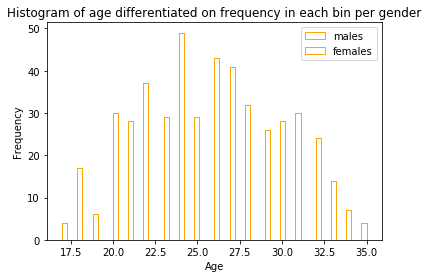

In [71]:
def balance_set(csv_contents_image_gender,csv_contents_image_age,age_low,age_high):
    csv_contents_image_gender_balanced = []
    csv_contents_image_age_balanced = []
    final_dict = []
    for age in range(age_low,age_high+1):
        age_list = []
        for index, item in enumerate(zip(csv_contents_image_age, csv_contents_image_gender)):
            if item[0]['age'] == age:
                age_list.append(item[1])
        dict_item = {age:age_list}
        if len(age_list) > 0:
            male_list = []
            female_list = []
            for entry in age_list:
                if entry['gender'] == "male":
                    male_list.append(entry)
                else:
                    female_list.append(entry)
            balanced_range = min(len(male_list),len(female_list))
            
            for j in range(balanced_range):
                csv_contents_image_gender_balanced.append(male_list[j])
                csv_contents_image_gender_balanced.append(female_list[j])
                
                partial_entry_file_age_male = {'name' : male_list[j]['name'], 'age' : age}
                partial_entry_file_age_female = {'name' : female_list[j]['name'], 'age' : age}
                
                csv_contents_image_age_balanced.append(partial_entry_file_age_male)
                csv_contents_image_age_balanced.append(partial_entry_file_age_female)
    
    return csv_contents_image_gender_balanced,csv_contents_image_age_balanced

csv_contents_image_gender = []
csv_contents_image_age = []
csv_contents_image_gender_complement = []
csv_contents_image_age_complement = []
with open('./sports_final.json') as f:
    data = json.load(f)
    #Get the balanced data
    csv_contents_image_gender,csv_contents_image_age,csv_contents_image_gender_complement,csv_contents_image_age_complement = Sampler(data,male_age_low=16,male_age_high=35,female_age_low=16,female_age_high=35)
    csv_contents_image_gender,csv_contents_image_age = balance_set(csv_contents_image_gender,csv_contents_image_age,17,35)
    stats(csv_contents_image_age,csv_contents_image_gender)
    csv_write(csv_contents_image_gender,'./sports_clean_gender_list_balanced.csv')
    csv_write(csv_contents_image_age,'./sports_clean_age_list_balanced.csv')